# Actividad - Iris dataset

En esta actividad vamos a practicar técnicas de análisis exploratorio vistas.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Estudiando el dataset

Vamos a empezar estudiando el dataset. Para eso lo primero que hacemos es cargarlos y ver cómo están formadas sus instancias y cuales son sus columnas.

In [3]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Entre los diferentes atributos tenemos los largos y anchos de pétalos y sépalos y la especie de la flor.

Conociendo estos atributos vamos a comenzar haciendo un análisis exploratorio y estadístico de los valores.

Existen muchas formas de estudiar las variables, en este caso elegimos obtener la siguiente información:
- Especies únicas existentes en el dataset 
- Obtener largo total del dataset
- Rango de valores en los cuales se encuentran los atributos
- Varianza de los atributos
- Desvío estandar
- Descripción estadística 

## Especies únicas y largo del dataset

In [4]:
especies = list(data["Species"].unique())
print("Tipos de especies: %s\n" % especies)

print("Largo del dataset: %i\n" % len(data))


Tipos de especies: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Largo del dataset: 150



## Rango del largo y ancho de pétalos y sépalos

In [5]:
print("Rango del largo del sépalo: [%s, %s]" % (min(data["SepalLengthCm"]), max(data["SepalLengthCm"])))
print("Rango del ancho del sépalo: [%s, %s]" % (min(data["SepalWidthCm"]), max(data["SepalLengthCm"])))
print("Rango del largo del pétalo: [%s, %s]" % (min(data["PetalLengthCm"]), max(data["PetalLengthCm"])))
print("Rango del ancho del pétalo: [%s, %s]\n" % (min(data["PetalWidthCm"]), max(data["PetalWidthCm"])))


Rango del largo del sépalo: [4.3, 7.9]
Rango del ancho del sépalo: [2.0, 7.9]
Rango del largo del pétalo: [1.0, 6.9]
Rango del ancho del pétalo: [0.1, 2.5]



## Varianza y desvío estandar

In [6]:

print("Varianza del largo del sépalo:\t %f" % np.var(data["SepalLengthCm"]))
print("Varianza del ancho del sépalo:\t %f" % np.var(data["SepalWidthCm"]))
print("Varianza del largo del pétalo:\t %f" % np.var(data["PetalLengthCm"]))
print("Varianza del ancho del pétalo:\t %f\n" % np.var(data["PetalWidthCm"]))

print("Desvío estandar del largo del sépalo\t %f" % np.std(data["SepalLengthCm"]))
print("Desvío estandar del ancho del sépalo\t %f" % np.std(data["SepalWidthCm"]))
print("Desvío estandar del largo del pétalo\t %f" % np.std(data["PetalLengthCm"]))
print("Desvío estandar del ancho del pétalo\t %f\n" % np.std(data["PetalWidthCm"]))


Varianza del largo del sépalo:	 0.681122
Varianza del ancho del sépalo:	 0.186751
Varianza del largo del pétalo:	 3.092425
Varianza del ancho del pétalo:	 0.578532

Desvío estandar del largo del sépalo	 0.825301
Desvío estandar del ancho del sépalo	 0.432147
Desvío estandar del largo del pétalo	 1.758529
Desvío estandar del ancho del pétalo	 0.760613



In [7]:
print("Descripción\n---")
print(data[data.columns[2:]].describe())

Descripción
---
       SepalWidthCm  PetalLengthCm  PetalWidthCm
count    150.000000     150.000000    150.000000
mean       3.054000       3.758667      1.198667
std        0.433594       1.764420      0.763161
min        2.000000       1.000000      0.100000
25%        2.800000       1.600000      0.300000
50%        3.000000       4.350000      1.300000
75%        3.300000       5.100000      1.800000
max        4.400000       6.900000      2.500000


# Cómo se distribuyen los datos

Ahora que ya tenemos la información básica descriptiva de nuestros datos vamos a hacer algunas visualización para estudiar la distribución de sus datos. Comenzaremos con histogramas de cada una de sus columnas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEBA7FBB70>,
      dtype=object)

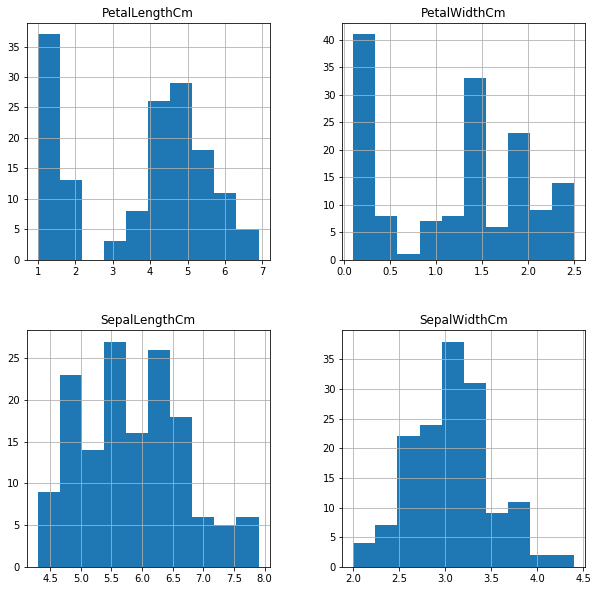

In [8]:
data.hist(
    column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],
    figsize=(10, 10))


Además de los histogramas podríamos haber hecho una visualización más informativa, como puede ser el `pairplot` que nos provee `seaborn`.

C:\Users\Dicsys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


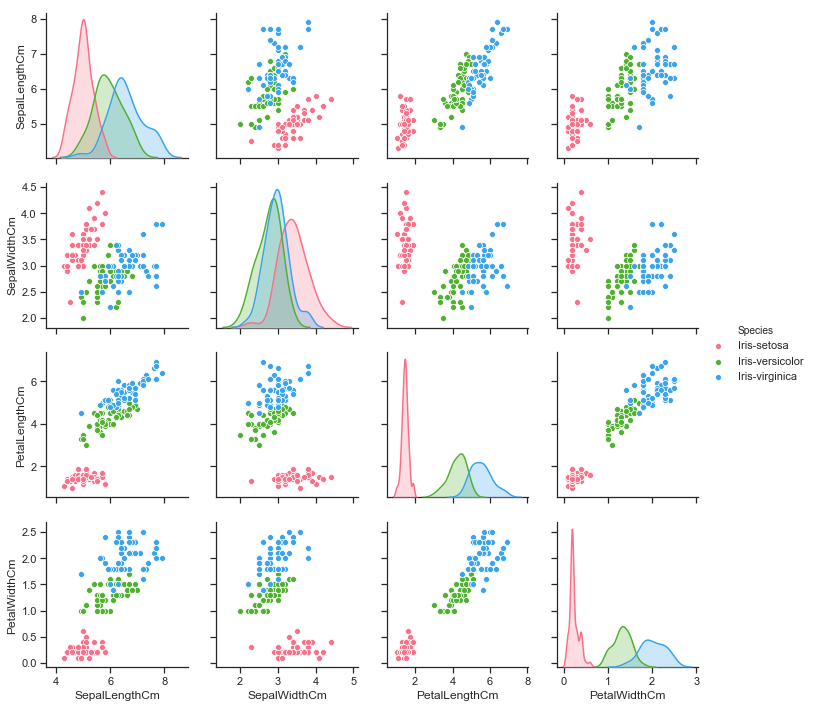

In [9]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data.drop('Id', axis=1), diag_kind='kde', hue="Species", palette="husl")


# Estudio de correlaciones

Ya estuvimos viendo diferentes visualizaciones de nuestros datos y realizando un análisis descriptivo a nivel estadístico de los campos. A continuación vamos a estudiar la correlación que existe entre las columnas para intentar sacar algunas conclusiones. 

In [10]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Una vez que tenemos la tabla de correlaciones podemos hacer un `heatmap` para ver más fácilmente estas relaciones.

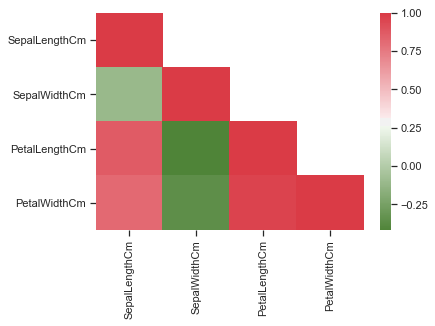

In [11]:
# Sacamos el id
dt = data[data.columns[1:]]

corr = dt.corr() #returns a dataframe, so it can be reused

# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)


# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

A partir de esta imagen podemos ver que tenemos una fuerte correlación entre:
    - Largo de pétalos y largo de sépalos
    - Ancho de pétalos y ancho de sépalos
    - Ancho de pétalos y largo de sépalos